In [1]:
# Transformers installation
! pip install transformers datasets
# To install from source instead of the last release, comment the command above and uncomment the following one.
# ! pip install git+https://github.com/huggingface/transformers.git

Building an **emotion detector** using a dataset from an article that explored how emotions are represented in English Twitter messages.footnote:[E. Saravia et al., "CARER: Contextualized Affect Representations for Emotion Recognition," Proceedings of the 2018 Conference on Empirical Methods in Natural Language Processing (Oct–Nov 2018): 3687–3697, http://dx.doi.org/10.18653/v1/D18-1404.]

Credit : Natural Language Processing with Transformers: Building Language Applications with Hugging Face, https://books.google.ch/books?id=7hhyzgEACAAJ

In [2]:
from datasets import list_datasets
# list of all available datasets
list_datasets()

['acronym_identification',
 'ade_corpus_v2',
 'UCLNLP/adversarial_qa',
 'aeslc',
 'afrikaans_ner_corpus',
 'ag_news',
 'allenai/ai2_arc',
 'air_dialogue',
 'ajgt_twitter_ar',
 'allegro_reviews',
 'allocine',
 'alt',
 'amazon_polarity',
 'amazon_reviews_multi',
 'amazon_us_reviews',
 'ambig_qa',
 'nala-cub/americas_nli',
 'ami',
 'amttl',
 'facebook/anli',
 'app_reviews',
 'aqua_rat',
 'aquamuse',
 'bigIR/ar_cov19',
 'ar_res_reviews',
 'ar_sarcasm',
 'arabic_billion_words',
 'arabic_pos_dialect',
 'arabic_speech_corpus',
 'arcd',
 'arsentd_lev',
 'art',
 'arxiv_dataset',
 'ascent_kb',
 'aslg_pc12',
 'asnq',
 'facebook/asset',
 'assin',
 'assin2',
 'atomic',
 'autshumato',
 'facebook/babi_qa',
 'banking77',
 'bbaw_egyptian',
 'bbc_hindi_nli',
 'bc2gm_corpus',
 'beans',
 'best2009',
 'opus/bianet',
 'bible_para',
 'big_patent',
 'billsum',
 'bing_coronavirus_query_set',
 'biomrc',
 'biosses',
 'TheBritishLibrary/blbooks',
 'TheBritishLibrary/blbooksgenre',
 'blended_skill_talk',
 'nyu-mll

In [3]:
from datasets import load_dataset

emotionData = load_dataset("emotion")
# The dataset is a dictionary already split into 3 parts: train, validation, test
# 16000 rows for training, and 2000 each for validation and testing
emotionData

No config specified, defaulting to: emotion/split
Found cached dataset emotion (C:/Users/drago/.cache/huggingface/datasets/emotion/split/1.0.0/cca5efe2dfeb58c1d098e0f9eeb200e9927d889b5a03c67097275dfb5fe463bd)


  0%|          | 0/3 [00:00<?, ?it/s]

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
})

In [ ]:
# let's see first element of the dataset
print(emotionData["train"][0])
print(emotionData["validation"][0])
print(emotionData["test"][0])

{'text': 'i didnt feel humiliated', 'label': 0}
{'text': 'im feeling quite sad and sorry for myself but ill snap out of it soon', 'label': 0}
{'text': 'im feeling rather rotten so im not very ambitious right now', 'label': 0}


In [ ]:
# defining datasets
trainData = emotionData["train"]
validationData = emotionData["validation"]
testData = emotionData["test"]

In [ ]:
# let's see what are the features
# Our input data is 3-dimensional
print(trainData.features)

{'text': Value(dtype='string', id=None), 'label': ClassLabel(names=['sadness', 'joy', 'love', 'anger', 'fear', 'surprise'], id=None)}


In [ ]:
import pandas as pd

trainDf = trainData.to_pandas()
trainDf

,text,label
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,3
3,i am ever feeling nostalgic about the fireplac...,2
4,i am feeling grouchy,3
...,...,...
15995,i just had a very brief time in the beanbag an...,0
15996,i am now turning and i feel pathetic that i am...,0
15997,i feel strong and good overall,1
15998,i feel like this was such a rude comment and i...,3


In [ ]:
# Add a new col for emotion in text format
def label_int2str(row):
 return trainData.features["label"].int2str(row)

trainDf["label_name"] = trainDf["label"].apply(label_int2str)
trainDf.head()


,text,label,label_name
0,i didnt feel humiliated,0,sadness
1,i can go from feeling so hopeless to so damned...,0,sadness
2,im grabbing a minute to post i feel greedy wrong,3,anger
3,i am ever feeling nostalgic about the fireplac...,2,love
4,i am feeling grouchy,3,anger


### Statistical Analysis

As we can see the dataset is very unbalanced so what we can do is:
- Randomly oversample the minority class.
- Randomly undersample the majority class.
- Gather more labeled data from the underrepresented classes.

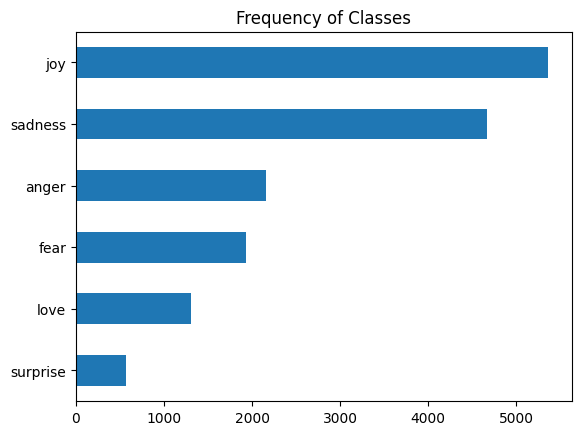

In [ ]:
import matplotlib.pyplot as plt

trainDf["label_name"].value_counts(ascending=True).plot.barh()
plt.title("Frequency of Classes")
plt.show()

In [ ]:
! pip install scikit-learn
! pip install imbalanced-learn

In [ ]:
import numpy as np
from imblearn.over_sampling import RandomOverSampler
from datasets import load_dataset

# Load the dataset
emotionData = load_dataset("emotion")

# Assuming 'train' is the training portion of your dataset
X_train = emotionData['train']['text']
y_train = emotionData['train']['label']

# Instantiate the random oversampler
oversampler = RandomOverSampler()

# Convert list to numpy array
X_train_array = np.array(X_train)

# Resample the dataset
X_resampled, y_resampled = oversampler.fit_resample(X_train_array.reshape(-1, 1), y_train)

# Convert back to original format
X_resampled = X_resampled.flatten()

# Now you can use X_resampled and y_resampled for training


/usr/local/lib/python3.10/dist-packages/datasets/load.py:1454: FutureWarning: The repository for emotion contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/emotion
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this dataset from the next major release of `datasets`.
  warnings.warn(


array(['i didnt feel humiliated',
       'i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake',
       'im grabbing a minute to post i feel greedy wrong', ...,
       'i admire makes me feel amazed at my life',
       'im feeling amazed with my california ness at the moment currently sitting by the pool drinking a wine spritzer out of nagalene connecting via google wifi and using stellarium to figure out the stars',
       'i don t have the longevity or experience in the field to get a feeling for that and i m curious as to what the speculation might be'],
      dtype='<U300')

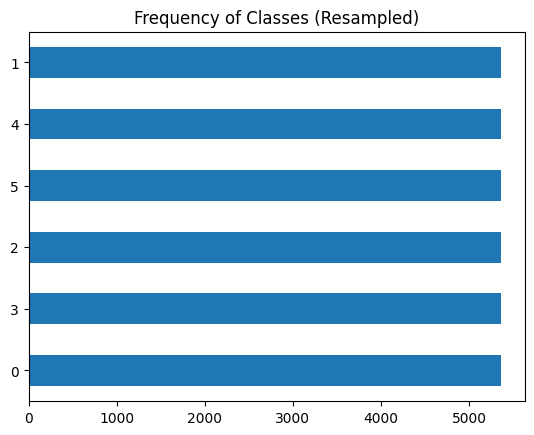

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Convert resampled training data to a DataFrame
resampled_df = pd.DataFrame({'text': X_resampled, 'label': y_resampled})

# Plot the frequency of classes
resampled_df["label"].value_counts(ascending=True).plot.barh()
plt.title("Frequency of Classes (Resampled)")
plt.show()
